In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 

In [ ]:
train = pd.read_csv('model.csv')

In [ ]:
test = pd.read_csv('val.csv')

# EDA

In [ ]:
train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,84.29,13.46,16.01,52.18,123101.84,0.23,4305.85,0.15,0.09,1.09,10,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,59.80,8.18,29.33,63.55,34275.73,0.80,3616.67,0.78,0.14,1.67,35,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,77.17,10.25,39.92,61.95,84841.79,0.78,2301.54,0.62,0.15,2.80,31,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,95.88,15.38,49.80,67.22,145261.11,0.09,3419.60,0.09,0.00,1.00,29,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,94.55,11.87,17.43,50.70,120522.80,0.17,3828.57,0.08,0.00,2.69,22,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [ ]:
train.shape

(94000, 31)

In [ ]:
train.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,9.400000e+04,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,82.561804,11.364377,20.453328,55.172549,1.036205e+05,0.282347,4113.993992,0.190747,0.112162,1.545606,53.707096,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,10.740732,2.767727,11.671429,12.015331,5.954836e+04,0.252047,1300.549863,0.181137,0.142458,0.627285,56.617973,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,77.270000,9.640000,13.600000,49.070000,6.562992e+04,0.130000,3422.220000,0.080000,0.000000,1.140000,19.000000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,83.340000,11.330000,19.110000,55.190000,9.074253e+04,0.250000,4050.000000,0.170000,0.090000,1.450000,39.000000,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,89.010000,12.790000,25.170000,61.810000,1.282739e+05,0.360000,4668.192500,0.250000,0.140000,1.860000,69.000000,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,100.000000,35.430000,237.000000,146.000000,1.079286e+06,7.000000,20000.000000,3.250000,5.000000,8.100000,1902.000000,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [ ]:
train.isna().sum()

A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14        0
A15        0
A16        0
A17        0
A18        0
A19        0
A20        0
A21        0
A22        0
A23        0
A24        0
A25        0
A26        0
A27        0
A28        0
A29        0
A30        0
default    0
dtype: int64

In [ ]:
train.default.value_counts(normalize=True)

0    0.957447
1    0.042553
Name: default, dtype: float64

In [ ]:
test.default.value_counts()

0    10000
1     1500
Name: default, dtype: int64

In [ ]:
X_train = train.drop('default', axis=1)
y_train = train[['default']]

X_test = test.drop('default', axis=1)
y_test = test[['default']]

# Correlation Analysis

In [ ]:
correlation_matrix = X_train.corr()

In [ ]:
correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)

In [ ]:
correlated_features = list(set(correlated_features))

In [ ]:
correlated_features

['A6',
 'A25',
 'A4',
 'A11',
 'A18',
 'A7',
 'A14',
 'A13',
 'A10',
 'A19',
 'A2',
 'A12',
 'A24']

In [ ]:
X_train = X_train.drop(correlated_features, axis=1)

In [ ]:
X_test = X_test.drop(correlated_features, axis=1)

# Balance Data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
sampler = RandomUnderSampler()
X_train, y_train = sampler.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(8000, 17)

# Standardize Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = pd.DataFrame(scaler.transform(X_train))

In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score

# Hyperparameter Tuning using GridSearch

In [ ]:
# model = LogisticRegression()

# parameter_grid = {'C': np.logspace(-5, 5, 100), 'class_weight': ['none', 'balanced'], 'max_iter': [20, 50, 100, 200, 500, 1000], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# log_mod = GridSearchCV(model, param_grid = parameter_grid, cv = 5, scoring='roc_auc', n_jobs=-1)

# grid_result = log_mod.fit(X_train,y_train.values.ravel())

# log_mod.best_params_

In [ ]:
# {'C': 0.04328761281083057,
#  'class_weight': 'none',
#  'max_iter': 200,
#  'penalty': 'l1',
#  'solver': 'saga'}

# Model Building

In [ ]:
model = LogisticRegression(C=0.04, solver='saga', penalty='l1', max_iter=200)

In [ ]:
model.fit(X_train,y_train.values.ravel())

LogisticRegression(C=0.04, max_iter=200, penalty='l1', solver='saga')

In [ ]:
y_pred_prob = model.predict_proba(X_test)

In [ ]:
y_pred_prob

array([[0.2063277 , 0.7936723 ],
       [0.5483354 , 0.4516646 ],
       [0.19723559, 0.80276441],
       ...,
       [0.2790963 , 0.7209037 ],
       [0.27768992, 0.72231008],
       [0.35551556, 0.64448444]])

In [ ]:
threshold = np.linspace(0.1, 0.9, 100)
roc_scores = []
for i in threshold:
  preds = np.where(y_pred_prob[:,1] > i, 1, 0)
  score = roc_auc_score(y_test, preds)
  roc_scores.append(score)

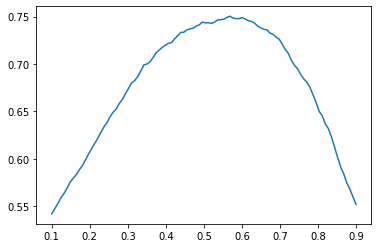

In [ ]:
plt.plot(np.linspace(0.1, 0.9, 100), roc_scores)
plt.show()

In [ ]:
y_pred = np.where(y_pred_prob[:,1] > threshold[roc_scores.index(max(roc_scores))], 1, 0)

# Model Evaluation

In [ ]:
y_test.value_counts()

default
0          10000
1           1500
dtype: int64

In [ ]:
accuracy_score(y_test, y_pred)

0.7958260869565218

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     10000
           1       0.35      0.69      0.47      1500

    accuracy                           0.80     11500
   macro avg       0.65      0.75      0.67     11500
weighted avg       0.87      0.80      0.82     11500



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

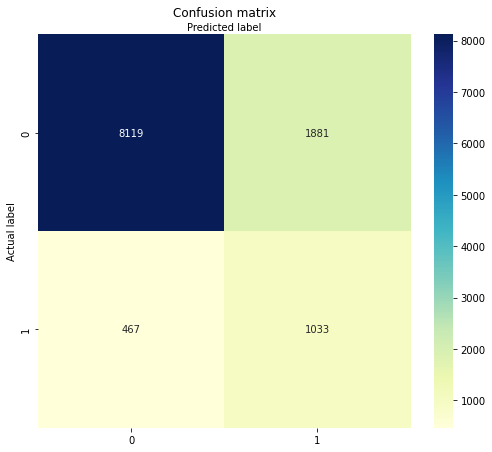

In [ ]:
class_names=[0, 1]
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

In [ ]:
p1 = precision_score(y_test, y_pred)
r1 = recall_score(y_test, y_pred)
a1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
c1 = roc_auc_score(y_test, y_pred)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])

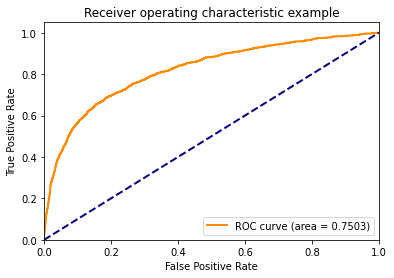

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc_score(y_test, y_pred),
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('AUC: ', roc_auc_score(y_test, y_pred))

AUC:  0.7502833333333334


# Save results to CSV file

In [ ]:
df = pd.DataFrame(y_pred_prob[:,1])

In [ ]:
df.to_csv('result1.csv', index=False, header=False)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning using GridSearch

In [ ]:
# parameter_grid = {'n_estimators': [50,100, 200, 500], 'max_depth': [5,10,20,50], 'min_samples_split': [1,2,5,10], 'min_samples_leaf': [1,2,4], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt']}

In [ ]:
# model = RandomForestClassifier()

# ran_mod = GridSearchCV(model, param_grid = parameter_grid, cv = 5, scoring='roc_auc', n_jobs=-1)

# grid_result = ran_mod.fit(X_train,y_train.values.ravel())

# ran_mod.best_params_

In [ ]:
# {'bootstrap': True,
#  'max_depth': 10,
#  'max_features': 'auto',
#  'min_samples_leaf': 5,
#  'min_samples_split': 10,
#  'n_estimators': 500}

# Model Building

In [ ]:
model = RandomForestClassifier(max_depth=10, n_estimators=500, min_samples_split=10, min_samples_leaf=5)

In [ ]:
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=500)

In [ ]:
y_pred_prob = model.predict_proba(X_test)

In [ ]:
threshold = np.linspace(0.1, 0.9, 100)
roc_scores = []
for i in threshold:
  preds = np.where(y_pred_prob[:,1] > i, 1, 0)
  score = roc_auc_score(y_test, preds)
  roc_scores.append(score)

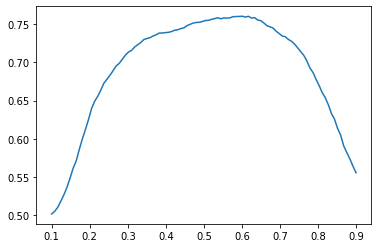

In [ ]:
plt.plot(np.linspace(0.1, 0.9, 100), roc_scores)
plt.show()

In [ ]:
y_pred = np.where(y_pred_prob[:,1] > threshold[roc_scores.index(max(roc_scores))], 1, 0)

# Model Evaluation

In [ ]:
accuracy_score(y_test, y_pred)

0.8177391304347826

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10000
           1       0.39      0.68      0.49      1500

    accuracy                           0.82     11500
   macro avg       0.67      0.76      0.69     11500
weighted avg       0.87      0.82      0.84     11500



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

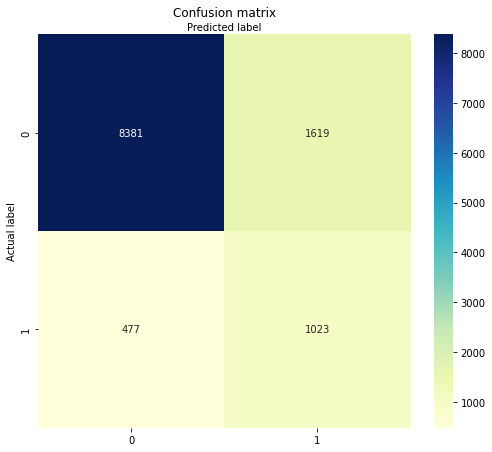

In [ ]:
class_names=[0, 1]
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

In [ ]:
p2 = precision_score(y_test, y_pred)
r2 = recall_score(y_test, y_pred)
a2 = accuracy_score(y_test, y_pred)
f2 = f1_score(y_test, y_pred)
c2 = roc_auc_score(y_test, y_pred)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])

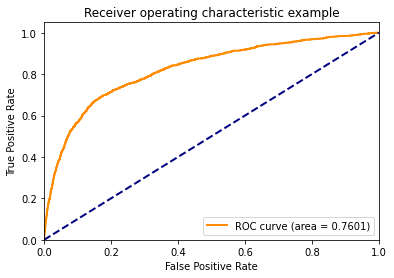

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc_score(y_test, y_pred),
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('AUC: ', roc_auc_score(y_test, y_pred))

AUC:  0.76005


# Performance Summary

In [ ]:
summary = np.array([c1,c2,a1,a2,f1,f2,r1,r2,p1,p2]).reshape(-1,2)

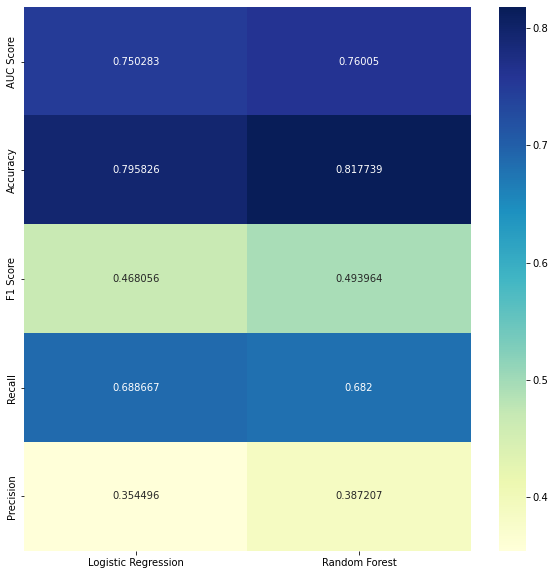

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
index= ['AUC Score', 'Accuracy', 'F1 Score', 'Recall', 'Precision']
cols = ['Logistic Regression', 'Random Forest']
df = pd.DataFrame(summary, index=index, columns=cols)
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt='g')
plt.show()

# Save results to CSV file

In [ ]:
df = pd.DataFrame(y_pred_prob[:,1])

In [ ]:
df.to_csv('result2.csv', index=False, header=False)